## CIFAR-10
- 10개 클래스로 구분된 32×32 크기의 사물 사진 데이터셋
- MNIST보다 데이터 복잡도가 높음
- 단순 신경망으로는 특징 검출이 어려움

In [1]:
# 모듈 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

plt.style.use('seaborn-white')

## 데이터 로드 및 전처리

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

# Train set 50000개, Test set 10000개
# 흑백이 아니므로 채널은 3 (RGB) : (개수, 크기, 크기, 채널)

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
print(y_test[5])

[6]


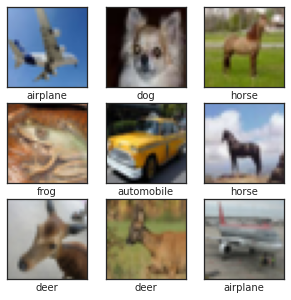

In [4]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck']

random_idx = np.random.randint(50000, size=9)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_full[idx])
    plt.xlabel(class_names[int(y_train_full[idx])])
    
plt.show();

In [5]:
# 표준화(Standardization) = (X - X.mean) / X.std
# 평균 0, 표준편차 1인 분포로 변

x_mean = np.mean(x_train_full, axis=(0,1,2))
x_std = np.std(x_train_full, axis=(0,1,2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std


# Validation Data 분할

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((40000, 32, 32, 3),
 (40000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

## 모델 구성 및 학습

In [6]:
def cnn_1():
    model = Sequential()
    
    input = Input(shape=(32,32,3))
    
    output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)
    
    output = Flatten()(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(10, activation='softmax')(output) # 10개 클래스로 구분
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
    
    return model

model_1 = cnn_1()
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0     

2022-09-06 09:03:34.033071: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
hist_1 = model_1.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_val,y_val))

2022-09-06 09:03:34.936121: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
157/157 [==============================] - 27s 168ms/step - loss: 1.8636 - accuracy: 0.3382 - val_loss: 1.6185 - val_accuracy: 0.4330
Epoch 2/30
157/157 [==============================] - 25s 162ms/step - loss: 1.5121 - accuracy: 0.4648 - val_loss: 1.4702 - val_accuracy: 0.4715
Epoch 3/30
157/157 [==============================] - 26s 165ms/step - loss: 1.3879 - accuracy: 0.5109 - val_loss: 1.3949 - val_accuracy: 0.5054
Epoch 4/30
157/157 [==============================] - 26s 165ms/step - loss: 1.3140 - accuracy: 0.5367 - val_loss: 1.3325 - val_accuracy: 0.5283
Epoch 5/30
157/157 [==============================] - 26s 164ms/step - loss: 1.2463 - accuracy: 0.5637 - val_loss: 1.2699 - val_accuracy: 0.5476
Epoch 6/30
157/157 [==============================] - 26s 167ms/step - loss: 1.1955 - accuracy: 0.5797 - val_loss: 1.2050 - val_accuracy: 0.5785
Epoch 7/30
157/157 [==============================] - 26s 165ms/step - loss: 1.1507 - accuracy: 0.5998 - val_loss: 1.2125 - val_ac

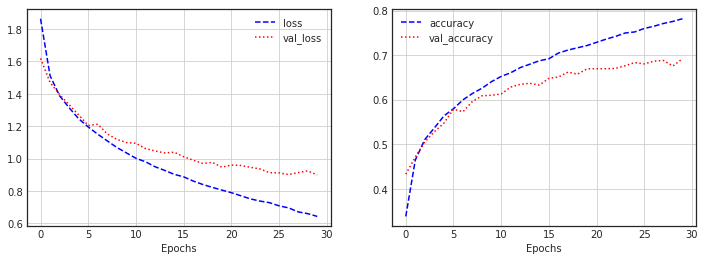

In [8]:
# 결과 확인

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show();

# Epoch가 진행될수록 과대적합

In [9]:
# 모델 평가

model_1.evaluate(x_test, y_test)

# 0.7012

313/313 [==============================] - 2s 8ms/step - loss: 0.9054 - accuracy: 0.6946


[0.9054450988769531, 0.694599986076355]

In [10]:
# 새로운 모

def cnn_2():
    model=Sequential()
    
    # CNN 레이어 구성
    input = Input(shape=(32,32,3))
    
    output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
    output = BatchNormalization()(output)
    output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
    output = BatchNormalization()(output)
    output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(output)
    output = BatchNormalization()(output)
    output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPool2D(strides=(2,2))(output)
    
    output = Flatten()(output)
    
    output = Dense(512, activation='relu')(output)
    output = Dropout(0.5)(output)
    
    output = Dense(256, activation='relu')(output)
    output = Dropout(0.5)(output)
    
    output = Dense(10, activation='softmax')(output) # 10개 클래스
    
    model=Model(inputs=[input], outputs=output)
    
    # 컴파일
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model_2 = cnn_2()
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       7385

In [11]:
hist_2=model_2.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/100
79/79 [==============================] - 212s 3s/step - loss: 2.0293 - accuracy: 0.2774 - val_loss: 2.3327 - val_accuracy: 0.0988
Epoch 2/100
79/79 [==============================] - 210s 3s/step - loss: 1.5325 - accuracy: 0.4353 - val_loss: 2.3108 - val_accuracy: 0.1234
Epoch 3/100
79/79 [==============================] - 211s 3s/step - loss: 1.3133 - accuracy: 0.5329 - val_loss: 2.2142 - val_accuracy: 0.2083
Epoch 4/100
79/79 [==============================] - 212s 3s/step - loss: 1.1568 - accuracy: 0.5954 - val_loss: 2.4143 - val_accuracy: 0.1680
Epoch 5/100
79/79 [==============================] - 216s 3s/step - loss: 1.0199 - accuracy: 0.6437 - val_loss: 2.2162 - val_accuracy: 0.2479
Epoch 6/100
79/79 [==============================] - 217s 3s/step - loss: 0.9287 - accuracy: 0.6783 - val_loss: 1.8967 - val_accuracy: 0.3087
Epoch 7/100
79/79 [==============================] - 219s 3s/step - loss: 0.8345 - accuracy: 0.7151 - val_loss: 1.9351 - val_accuracy: 0.3322
Epoch 

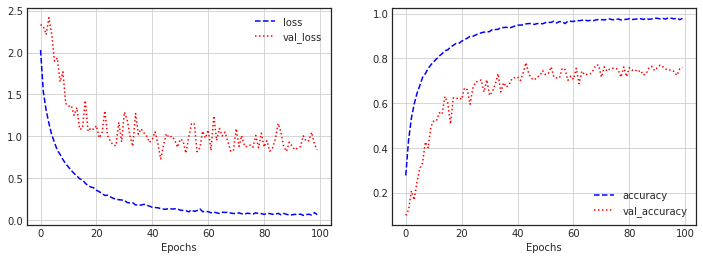

In [12]:
# 결과 확인

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show();

# 추가로 모델을 작게하여 파라미터 수를 작게하는 등의 조정 필요